# Processamento inicial dos dados e construção de um CSV legível

In [31]:
import pandas as pd

In [32]:
dic   = pd.read_excel('dicionario.xls', dtype = str)
sizes = dic[~dic['size'].isna()]
sizes = sizes['size'].values.tolist()
sizes = [int(x) for x in sizes]

names = dic[~dic['code'].isna()]
names = names.loc[~names['code'].duplicated(keep='first')]

In [33]:
#type(names)
#sizes[0]
df = pd.read_fwf('PNS_2019.txt', widths=sizes, names=names['code'])

In [34]:
df.to_csv('PNS_2019.csv')

# preprocessamento
Essa etapa requer a presença do arquivo <span style = "color: rgb(20,170,50)">**PNS_2019.csv**</span>

In [35]:
import pandas as pd
import datetime

In [36]:
df  = pd.read_csv('PNS_2019.csv')
dic = pd.read_excel('pre_proc_dicionario.xls')

## Criação do dataset preprocessado

In [37]:
codes = dic.code.dropna()
df = df[dic.code.dropna().tolist()]

In [38]:
df.to_csv('pre_proc_dataset.csv')

## Renomear colunas

In [39]:
names = dic[~dic['name'].isna()]
names = names.loc[~names['name'].duplicated(keep='first')]
df.set_axis(names['name'], axis=1, inplace=True)

In [40]:
df['exercicio'].isnull().sum()

257328

In [41]:
df.to_csv('pre_proc_dataset.csv', index=False)

## Processar colunas

In [42]:
df = pd.read_csv('pre_proc_dataset.csv')

In [43]:
now = datetime.datetime.now()

In [44]:
def calculate_age(row):
    if pd.isna(row['nascimento']):
        return pd.NaT
    elif row['nascimento'] == 9999:
        return 9999
    else:
        birth_year = int(row['nascimento'])
        age = now.year - birth_year
        return age

In [45]:
df['altura'] = df[['alt_1', 'alt_2', 'alt_f']].mean(axis=1)
df['peso'] = df[['peso_1', 'peso_2', 'peso_f']].mean(axis=1)
df['imc'] = df['peso'] / (df['altura'] ** 2)

df['idade'] = df.apply(lambda row: calculate_age(row), axis=1)

df = df.drop(['alt_1', 'alt_2', 'alt_f','peso_1', 'peso_2', 'peso_f', 'altura', 'peso', 'nascimento', 'imc', 'exercicio'], axis=1)


In [46]:
df.to_csv('pre_proc_dataset.csv', index=False)

# Exploração inicial
Essa etapa requer o arquivo <span style = "color: rgb(20,170,50)">**pre_proc_dataset.csv**</span>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Informações Basicas

In [3]:
df = pd.read_csv('pre_proc_dataset.csv')
df.head()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
0,11,2.0,1.0,3.0,6.0,3.0,7.0,2.0,0.0,3.0,...,NaN,NaN,NaN,3.0,1.0,1.0,NaN,NaN,2.0,60.0
1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,73.0
2,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36.0
3,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9999.0
4,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9999.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              293726 non-null  int64  
 1   sexo            279382 non-null  float64
 2   verd/legu       90846 non-null   float64
 3   carne_verm      90846 non-null   float64
 4   carne_fran      90846 non-null   float64
 5   carne_peix      90846 non-null   float64
 6   tomar_suco      90846 non-null   float64
 7   suco_tipo       30696 non-null   float64
 8   suco_natu       90846 non-null   float64
 9   frutas          90846 non-null   float64
 10  refri           90846 non-null   float64
 11  refri_tipo      41184 non-null   float64
 12  leite           90846 non-null   float64
 13  leite_tipo      63104 non-null   float64
 14  doces           90846 non-null   float64
 15  lanches         90846 non-null   float64
 16  consum_sal      90846 non-null   float64
 17  feijao    

In [5]:
df.describe()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
count,293726.000000,279382.000000,90846.000000,90846.000000,90846.000000,90846.000000,90846.000000,30696.000000,90846.000000,90846.000000,...,4905.000000,4905.000000,4905.000000,90846.000000,88736.000000,82881.000000,4905.000000,7101.000000,279210.000000,279382.000000
mean,28.844716,1.518788,4.398058,3.307939,2.895725,1.105673,1.196574,1.996123,2.597407,4.020188,...,1.938634,1.899694,1.939246,2.165544,1.731214,1.837466,33.613660,50.265033,3.197174,622.253685
std,11.762108,0.499648,2.460666,2.072346,1.770469,1.501453,2.092730,0.225044,2.409686,2.500836,...,0.240025,0.300438,0.238903,0.753347,0.443331,0.368942,16.116982,15.065001,1.504282,2337.288348
min,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000
25%,21.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,22.000000,42.000000,2.000000,22.000000
50%,27.000000,2.000000,5.000000,3.000000,3.000000,1.000000,0.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,32.000000,51.000000,3.000000,40.000000
75%,35.000000,2.000000,7.000000,5.000000,4.000000,2.000000,2.000000,2.000000,4.000000,7.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,44.000000,60.000000,4.000000,60.000000
max,53.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,7.000000,7.000000,...,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,92.000000,97.000000,7.000000,9999.000000


# Processamento inicial

## Remoção inicial de linhas

In [6]:
# remover todas as linhas que não tem valores em diabetes
df.dropna(subset=['diabetes'], inplace=True)

In [7]:
# remover todas as linhas que não tem a idade de quem tem diabetes
df = df.drop(df[(df['diabetes'] == 1) & (df['diabetes_idade'].isna())].index)

In [8]:
df = df.drop(df[(df['hipertensao'].isna())].index)

In [9]:
df = df.drop(df[(df['colesterol'].isna())].index)

In [10]:
df = df.drop(df[(df['renda'].isna())].index)

In [11]:
df = df.drop(df[df['idade'] == 9999].index)

In [12]:
# remover as linhas com valores inválidos para a idade 
df.drop(df[df['idade'] == -7976].index, inplace=True)

In [13]:
df.to_csv('proc_dataset[dropped_lines].csv', index=False)

## Correlações

In [14]:
df = pd.read_csv('proc_dataset[dropped_lines].csv')

In [15]:
corr = df.corr()
corr.to_csv('correlation.csv')
corr

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
uf,1.000000,-0.004860,0.189460,0.179196,-0.009583,-0.278430,0.091034,-0.036381,-0.113169,0.065604,...,0.047699,-0.040229,-0.045329,-0.083194,-0.033629,-0.009665,0.014326,0.002835,0.255580,0.050646
sexo,-0.004860,1.000000,0.073042,-0.144572,0.055141,-0.002715,-0.024178,-0.017867,0.039122,0.121474,...,0.136625,0.045120,0.012579,0.070203,-0.076167,-0.092113,0.047715,0.000806,-0.065381,0.008964
verd/legu,0.189460,0.073042,1.000000,0.061704,0.044348,0.004381,-0.056035,-0.034447,0.174414,0.358061,...,0.044324,0.048603,0.017468,-0.103477,-0.046409,-0.033697,0.112732,0.025233,0.247767,0.108031
carne_verm,0.179196,-0.144572,0.061704,1.000000,-0.200820,-0.219051,0.079598,0.013419,-0.010070,-0.027762,...,0.038510,0.003999,0.006093,-0.086429,0.065459,0.052590,-0.050346,-0.038635,0.111366,-0.088748
carne_fran,-0.009583,0.055141,0.044348,-0.200820,1.000000,0.034430,0.026926,0.001619,0.066184,0.057749,...,0.017362,0.018493,0.023048,0.002249,-0.021733,-0.015708,-0.012733,-0.018603,-0.038140,-0.036451
carne_peix,-0.278430,-0.002715,0.004381,-0.219051,0.034430,1.000000,-0.071036,0.006865,0.121279,0.081358,...,-0.019441,0.031926,0.015708,0.014629,-0.021236,-0.015124,0.054190,0.023414,-0.052083,0.068110
tomar_suco,0.091034,-0.024178,-0.056035,0.079598,0.026926,-0.071036,1.000000,-0.009358,-0.207267,-0.112947,...,-0.037242,-0.053067,-0.009826,-0.010149,0.057726,0.059345,-0.109676,-0.066035,-0.115789,-0.142926
suco_tipo,-0.036381,-0.017867,-0.034447,0.013419,0.001619,0.006865,-0.009358,1.000000,0.015002,-0.057970,...,-0.014247,0.012240,-0.011297,-0.002372,0.049842,0.040262,-0.069342,-0.080541,-0.109426,-0.084720
suco_natu,-0.113169,0.039122,0.174414,-0.010070,0.066184,0.121279,-0.207267,0.015002,1.000000,0.260154,...,0.003886,0.015918,0.006746,-0.050708,0.013113,0.000867,0.030959,0.001721,0.063702,-0.003896
frutas,0.065604,0.121474,0.358061,-0.027762,0.057749,0.081358,-0.112947,-0.057970,0.260154,1.000000,...,0.036968,0.035596,0.007718,-0.073891,-0.070381,-0.068536,0.147771,0.077323,0.238659,0.172763


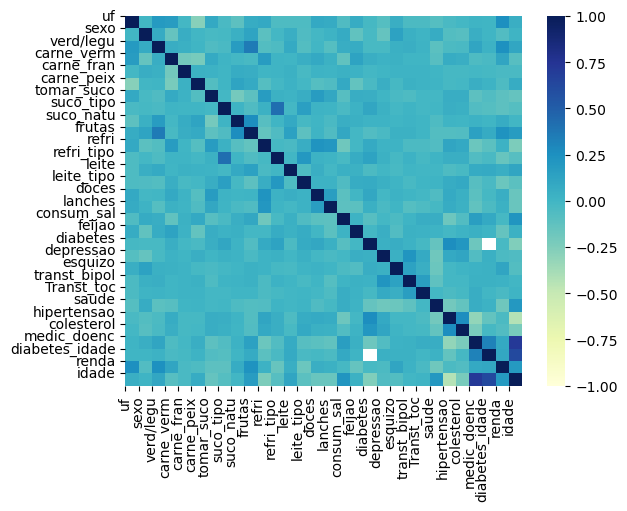

In [16]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [17]:
df.corrwith(df["diabetes"])

uf               -0.021358
sexo             -0.028589
verd/legu        -0.027955
carne_verm        0.052278
carne_fran       -0.011993
carne_peix       -0.031892
tomar_suco        0.053759
suco_tipo         0.105221
suco_natu         0.018352
frutas           -0.067912
refri             0.083088
refri_tipo        0.131022
leite            -0.046634
leite_tipo        0.072097
doces             0.096315
lanches           0.041632
consum_sal       -0.093009
feijao           -0.014668
diabetes          1.000000
depressao         0.041055
esquizo           0.059107
transt_bipol      0.027389
Transt_toc       -0.022201
saude            -0.142181
hipertensao       0.260762
colesterol        0.204060
medic_doenc      -0.174069
diabetes_idade         NaN
renda            -0.027298
idade            -0.256133
dtype: float64

## checagem de valores ausentes

In [18]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
suco_tipo : True -> 52635
refri_tipo : True -> 43562
leite_tipo : True -> 23084
esquizo : True -> 73171
transt_bipol : True -> 73171
Transt_toc : True -> 73171
medic_doenc : True -> 73171
diabetes_idade : True -> 70965


In [19]:
# quantos dados temos no dataset
len(df.index)

77721

In [20]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 1].index)

6756

In [21]:
# quantos individuos com diabetes negada
len(df[df['diabetes'] == 2].index)

70965

## separação dos dados com mesma proporção de indivíduos com diabetes e sem diabetes

In [22]:
dados_1 = df[df['diabetes'] == 1]
dados_2 = df[df['diabetes'] == 2]
total_instancias_1 = len(dados_1)
dados_2_selecionados = dados_2.sample(n=total_instancias_1, random_state=12)
df = pd.concat([dados_1, dados_2_selecionados])

In [23]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 1].index)

6756

In [24]:
# quantos individuos com diabetes negada
len(df[df['diabetes'] == 2].index)

6756

<AxesSubplot:xlabel='diabetes', ylabel='count'>

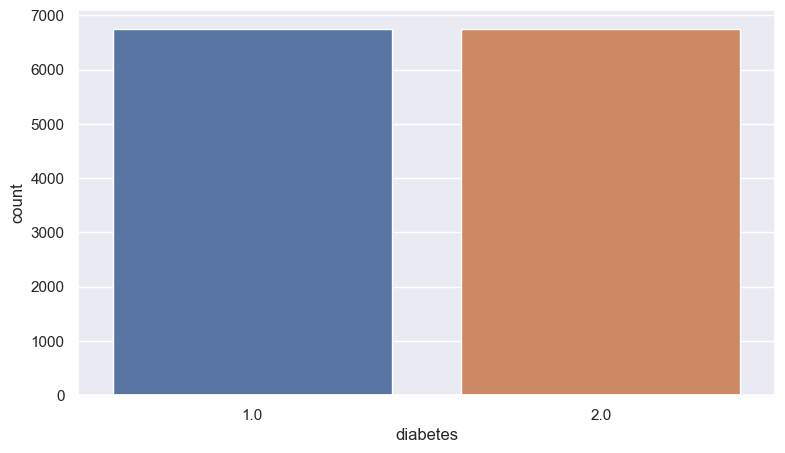

In [25]:
# em gráfico

sns.set()
sns.set(rc = {'figure.figsize':(9,5)})
sns.countplot(x="diabetes",data=df)

In [26]:
df.to_csv('proc_dataset[balanced].csv', index=False)

## Remoção de colunas com muitos valores nulos

In [27]:
df = pd.read_csv('proc_dataset[balanced].csv')

In [28]:
df.drop(['esquizo', 'transt_bipol', 'Transt_toc', 'medic_doenc','suco_tipo', 'leite_tipo', 'refri_tipo'],axis=1, inplace=True)

In [29]:
df.to_csv('proc_dataset[null_cull].csv', index=False)

## Análise numérica

In [30]:
df = pd.read_csv('proc_dataset[null_cull].csv')

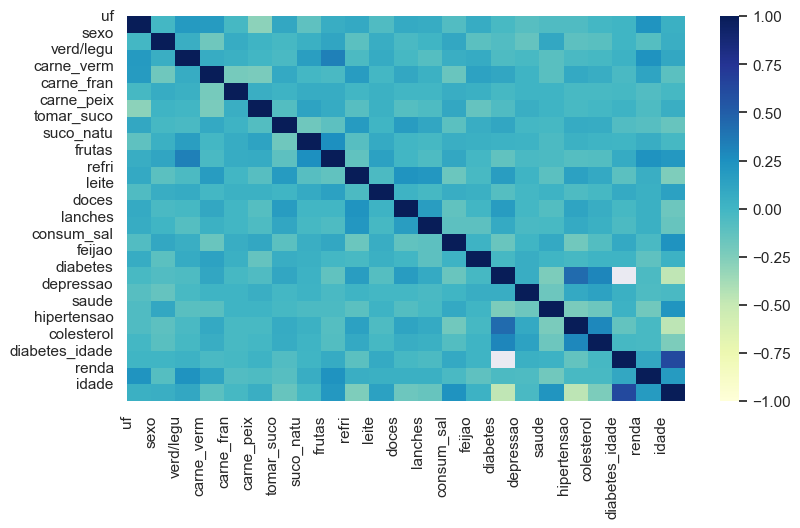

In [31]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [32]:
# Variabilidade de cada variável

df.std()

uf                11.357388
sexo               0.495884
verd/legu          2.407668
carne_verm         2.099879
carne_fran         1.810127
carne_peix         1.481850
tomar_suco         1.945613
suco_natu          2.432746
frutas             2.484013
refri              1.648978
leite              3.035184
doces              2.023040
lanches            1.030808
consum_sal         0.758924
feijao             2.325764
diabetes           0.500019
depressao          0.324676
saude              0.813395
hipertensao        0.497627
colesterol         0.447096
diabetes_idade    14.898883
renda              1.516435
idade             17.136353
dtype: float64

uf : 0.2790863602708672
sexo : -0.2588293801904059
verd/legu : -0.44722302851217294
carne_verm : 0.4332387364578926
carne_fran : 0.5703959496199131
carne_peix : 1.8060961454893862
tomar_suco : 2.0550553685035045
suco_natu : 0.62042443769289
frutas : -0.31852945137948174
refri : 2.2871002996239493
leite : -0.18899993727845193
doces : 1.6311057184465847
lanches : 3.903354250109548
consum_sal : 0.04669370530167816
feijao : -0.835132881374321
diabetes : 0.0
depressao : -2.342712992538333
saude : 0.6154803705121515
hipertensao : -0.19634272207891523


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


colesterol : -1.0016115799901377
diabetes_idade : -0.7016023012076459
renda : 0.4355056823134
idade : -0.2098652671624241


<Figure size 2000x1500 with 0 Axes>

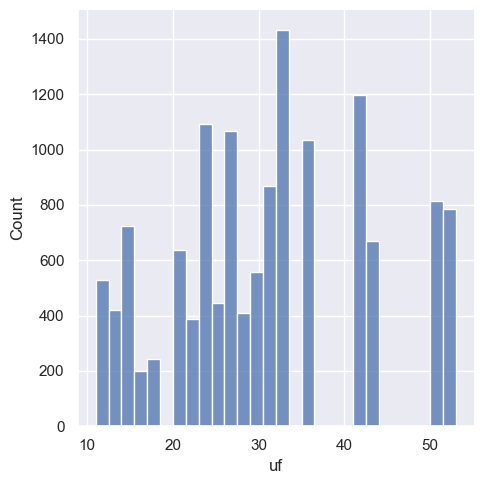

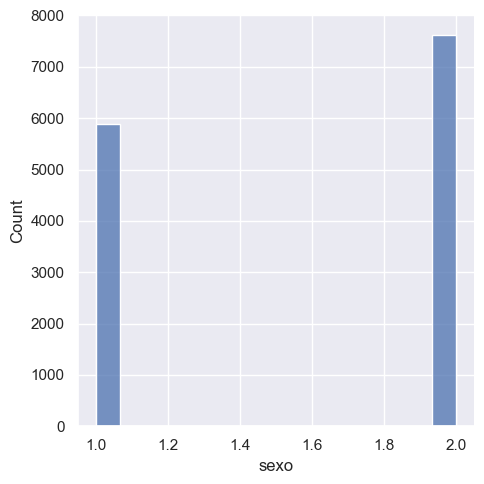

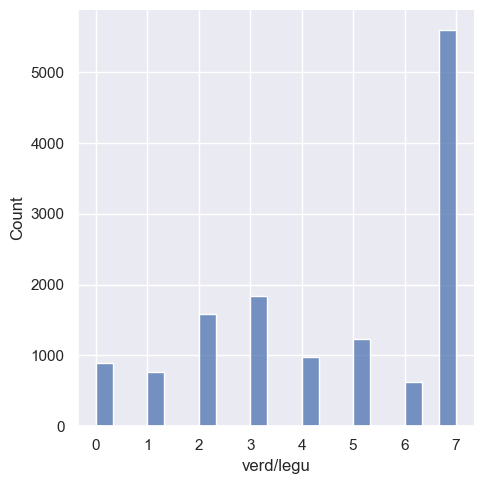

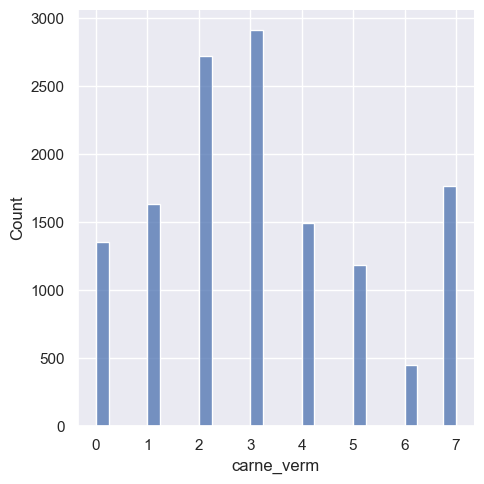

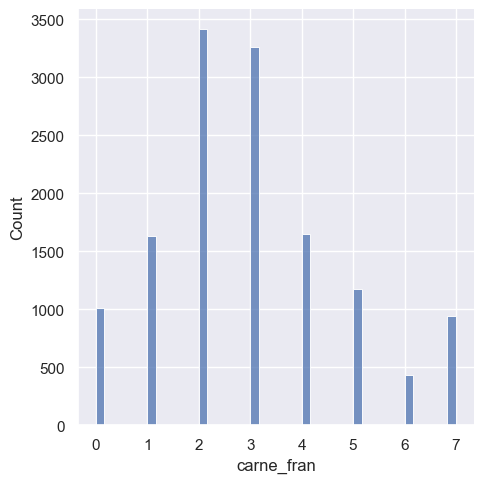

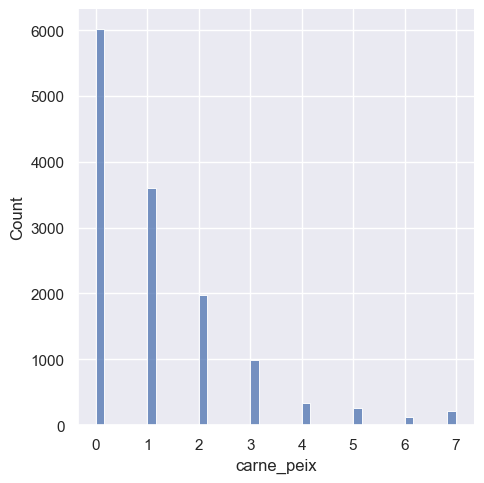

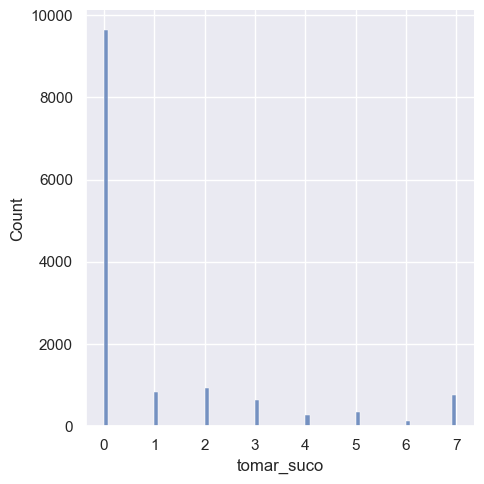

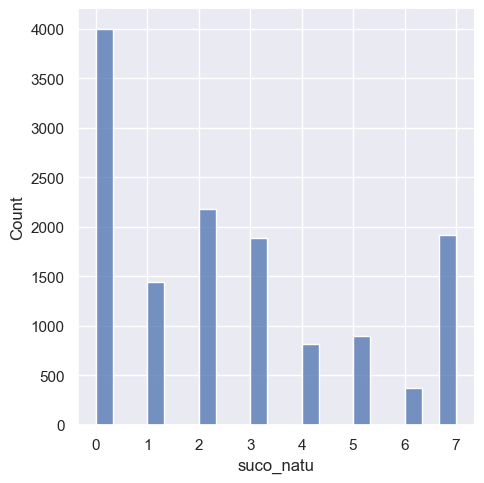

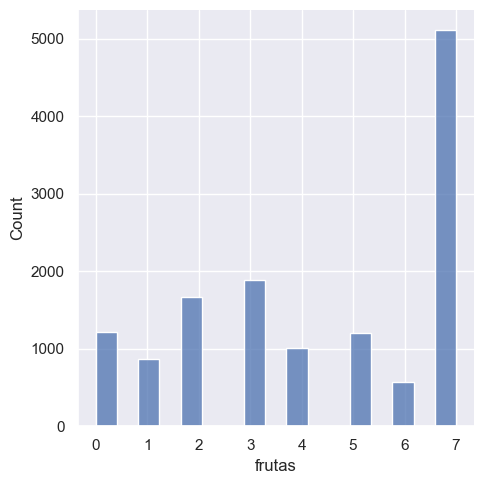

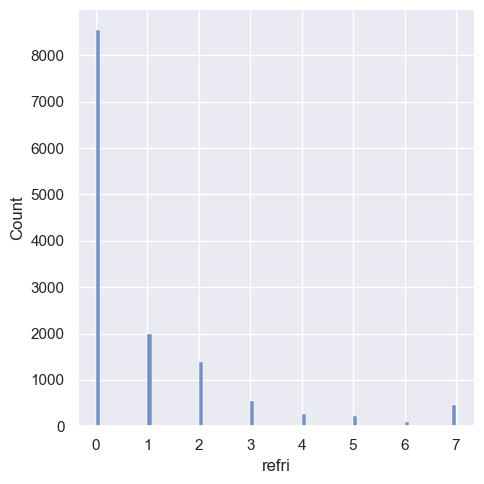

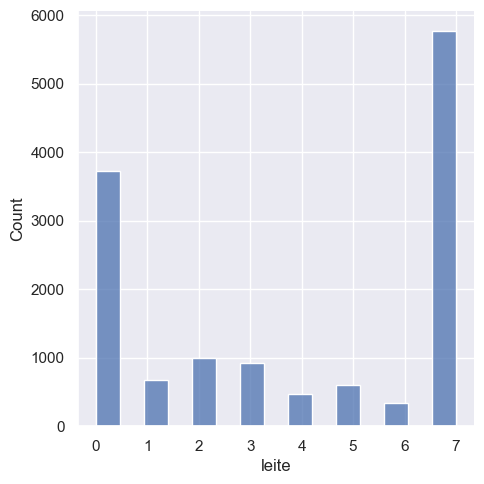

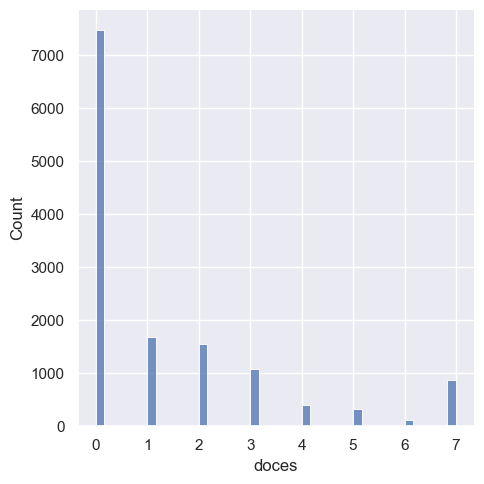

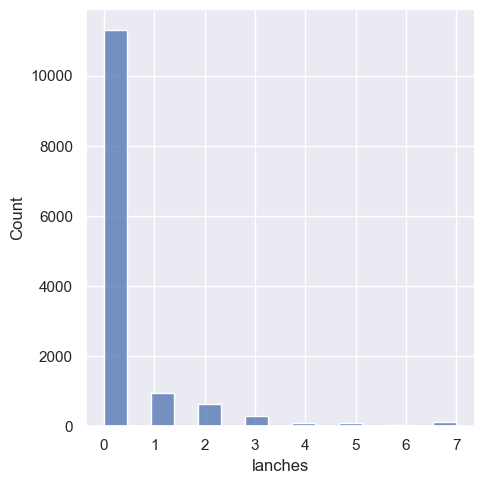

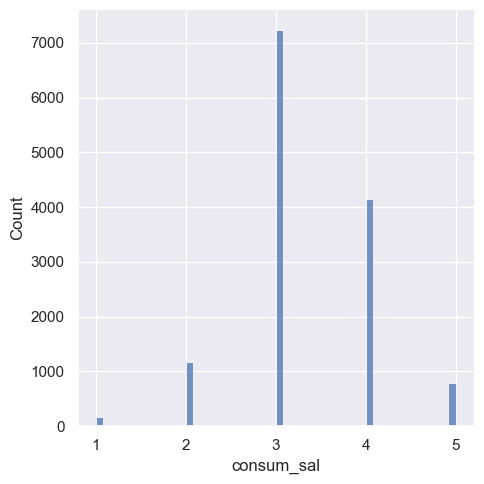

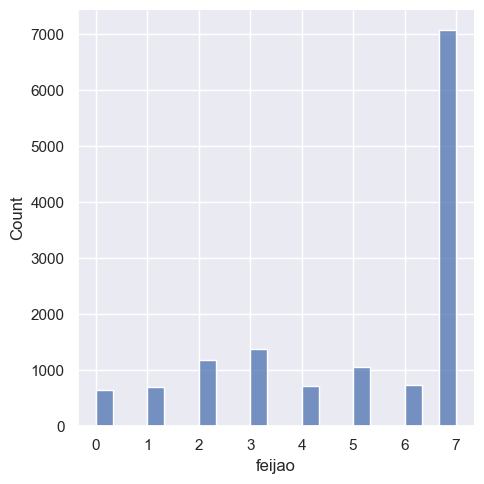

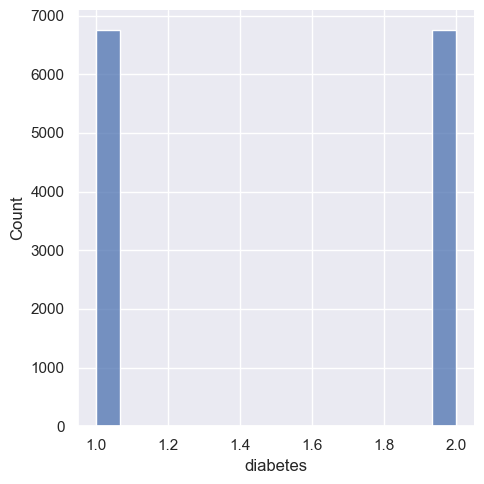

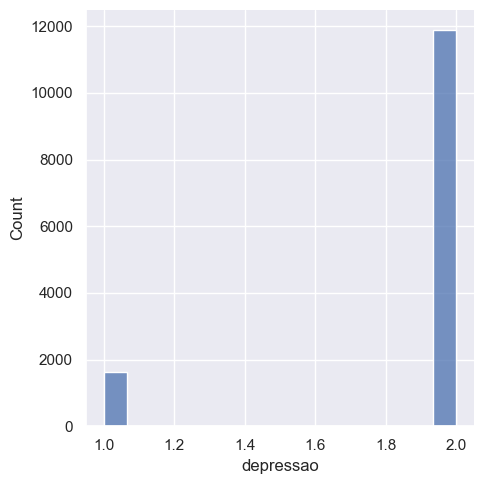

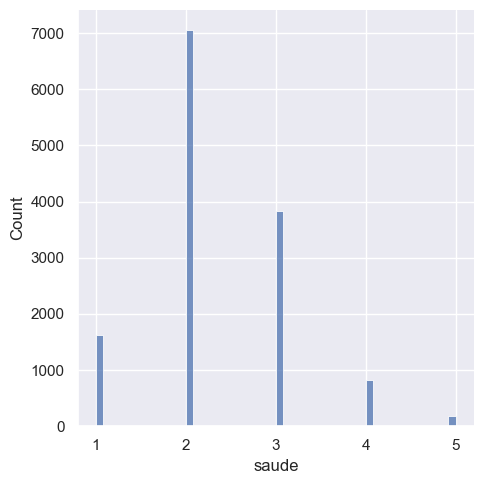

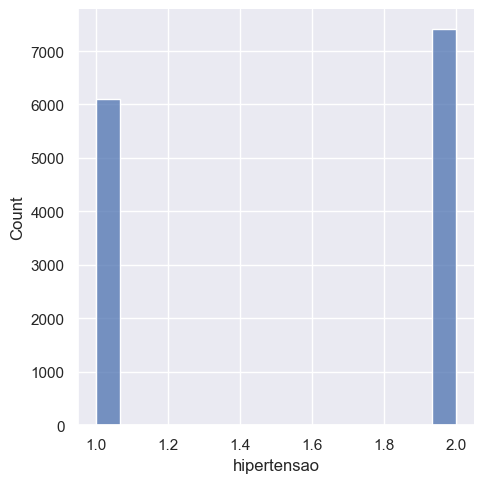

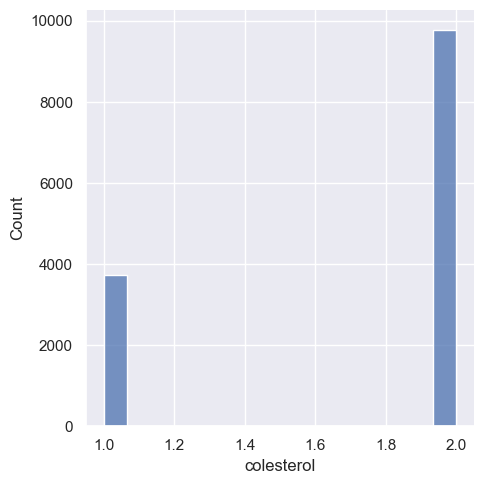

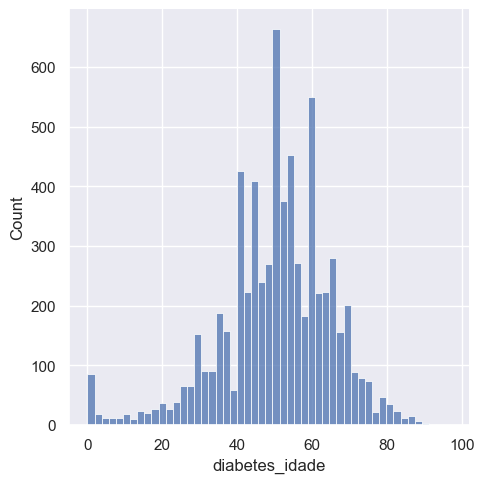

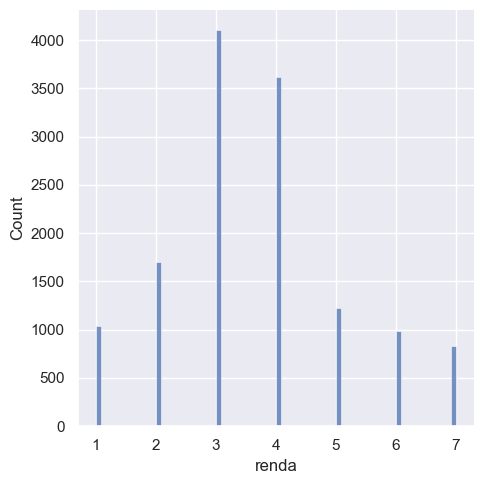

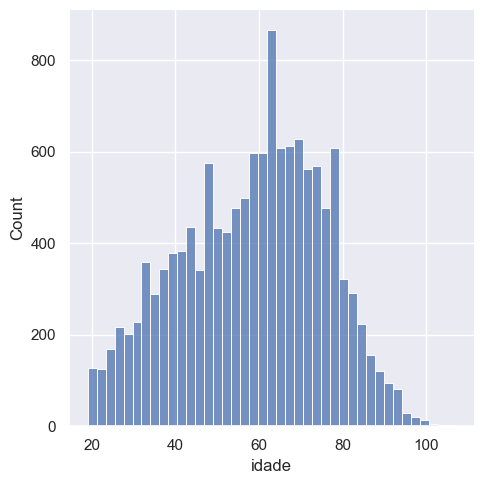

In [33]:
# Verificar as distribuições normais entre as variáveis contínuas

plt.figure(figsize=(20,15))
j=1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        sns.displot(df[i])
        #plt.subplot(2,3,j)
        j+=1
        print(df[i].name, ':', df[i].skew())
#plt.tight_layout()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Density plot')

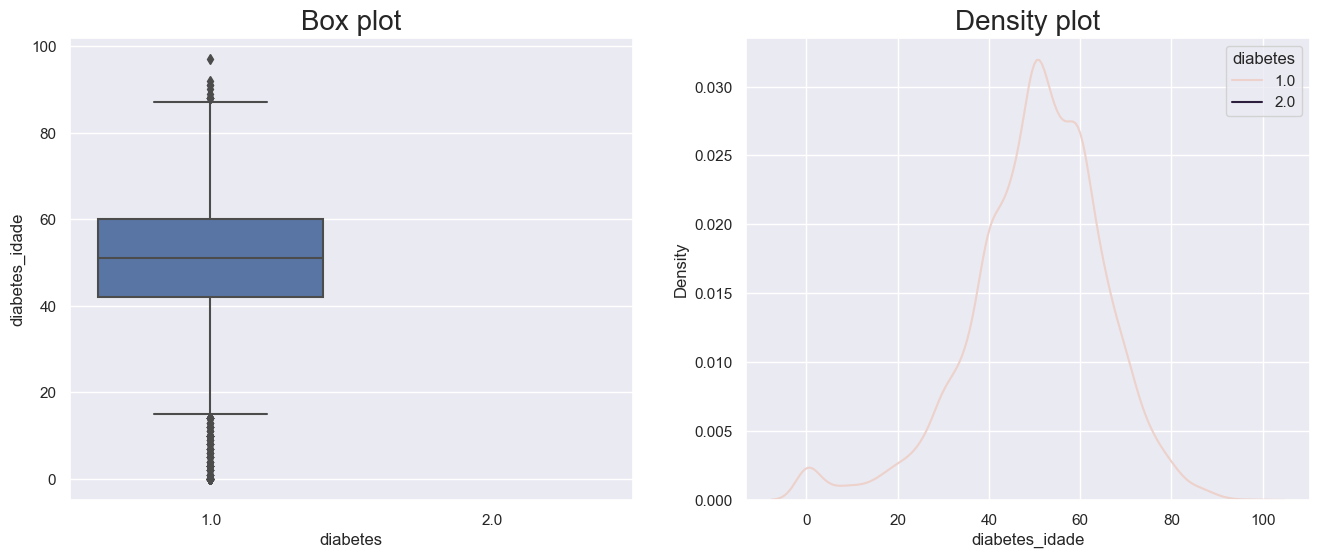

In [34]:
sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

# Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x="diabetes", y="diabetes_idade", data=df)
bp_ax.set_title('Box plot', fontsize = 20)

# Função Densidade de Probabilidade
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x='diabetes_idade', hue='diabetes', data=df)
dp_ax.set_title('Density plot', fontsize = 20)

# Boxplots: Distribuição do atributo (age) para cada classe de saída (survived), além de fornecer informações sobre os outliers
# Gráficos de densidade : Distribuição e a forma da distribuição (semelhante a normal ou qualquer outra distribuição) do atributo
# Gráficos de contagem empilhados: Informa sobre a contagem de cada categoria do atributo, e com informações sobre a porcentagem de cada categoria

In [35]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].max())

Valores ausentes (NaN) em:
uf : False -> 53
sexo : False -> 2.0
verd/legu : False -> 7.0
carne_verm : False -> 7.0
carne_fran : False -> 7.0
carne_peix : False -> 7.0
tomar_suco : False -> 7.0
suco_natu : False -> 7.0
frutas : False -> 7.0
refri : False -> 7.0
leite : False -> 7.0
doces : False -> 7.0
lanches : False -> 7.0
consum_sal : False -> 5.0
feijao : False -> 7.0
diabetes : False -> 2.0
depressao : False -> 2.0
saude : False -> 5.0
hipertensao : False -> 2.0
colesterol : False -> 2.0
diabetes_idade : True -> 97.0
renda : False -> 7.0
idade : False -> 107.0


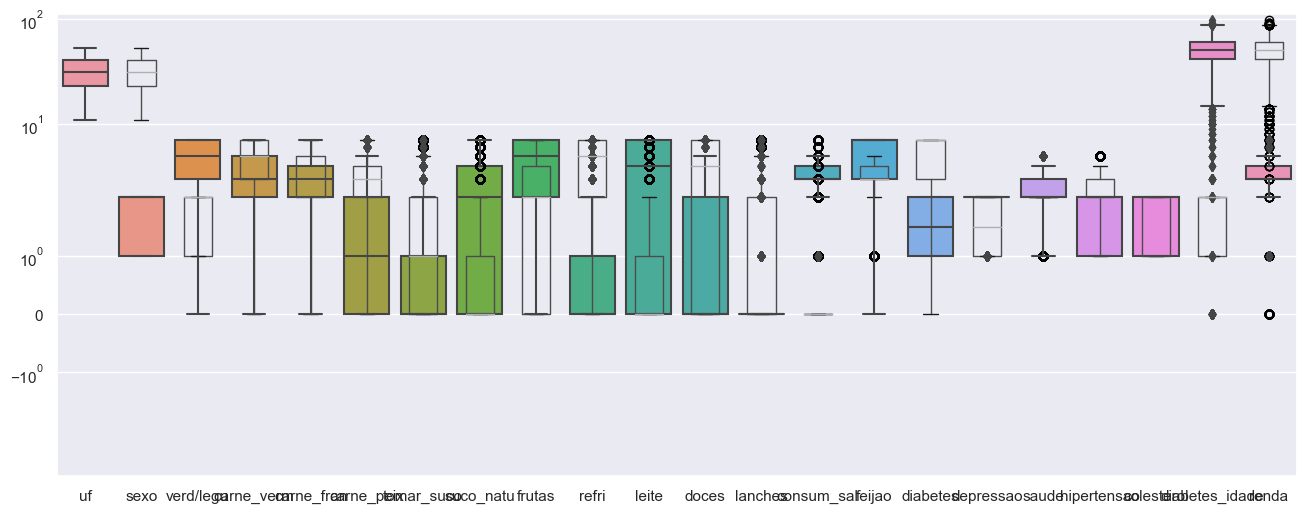

In [36]:
# Boxplot de todos os atributos contínuos antes da padronização

df.boxplot()
cols = [col for col in df.columns if col != 'idade']
sns.boxplot(data=df[cols])
plt.yscale('symlog')

## processamento final

In [37]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
diabetes_idade : True -> 6756


In [38]:
df['diabetes'] = df['diabetes'].replace(2, 0)

In [39]:
df['diabetes_idade'].fillna(df['diabetes_idade'].mean(), inplace=True)

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def scale():
    scaler.fit(df.drop('diabetes',axis=1))
    scaled_features = scaler.transform(df.drop('diabetes',axis=1))
    df_feat = pd.DataFrame(scaled_features,columns=df.drop('diabetes', axis=1).columns)
    df_feat.head()
    x = df_feat
    y = df['diabetes']

scale()

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def scale():
    scaler.fit(df.drop('diabetes',axis=1))
    scaled_features = scaler.transform(df.drop('diabetes',axis=1))
    df_feat = pd.DataFrame(scaled_features,columns=df.drop('diabetes', axis=1).columns)
    x = df_feat
    y = df['diabetes']

scale()

In [68]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

# treinando o modelo

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [120]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
tree_pred = clf.predict(x_test)

In [121]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
forest_pred = clf.predict(x_test)

In [122]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
svm_pred = clf.predict(x_test)

In [123]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
def knnRange(min, max):
    for i in range(min, max):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        pred_i = knn.predict(x_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(25,4))
    plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')    


#knnRange(1,100)



In [124]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## métricas

In [125]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### tree prediction

In [126]:
print(confusion_matrix(y_test, tree_pred))

[[2045    0]
 [   0 2009]]


In [127]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2045
         1.0       1.00      1.00      1.00      2009

    accuracy                           1.00      4054
   macro avg       1.00      1.00      1.00      4054
weighted avg       1.00      1.00      1.00      4054



In [128]:
accuracy = accuracy_score(y_test, tree_pred)
print("Acurácia:", accuracy)

Acurácia: 1.0


### forest prediction

In [129]:
print(confusion_matrix(y_test, forest_pred))

[[2045    0]
 [   0 2009]]


In [130]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2045
         1.0       1.00      1.00      1.00      2009

    accuracy                           1.00      4054
   macro avg       1.00      1.00      1.00      4054
weighted avg       1.00      1.00      1.00      4054



In [131]:
accuracy = accuracy_score(y_test, forest_pred)
print("Acurácia:", accuracy)

Acurácia: 1.0


### SVM prediction

In [132]:
print(confusion_matrix(y_test, svm_pred))

[[1470  575]
 [ 132 1877]]


In [133]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      2045
         1.0       0.77      0.93      0.84      2009

    accuracy                           0.83      4054
   macro avg       0.84      0.83      0.82      4054
weighted avg       0.84      0.83      0.82      4054



In [134]:
accuracy = accuracy_score(y_test, svm_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8256043413912185


### KNN predictions

In [135]:
print(confusion_matrix(y_test, knn_pred))

[[1950   95]
 [ 374 1635]]


In [136]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      2045
         1.0       0.95      0.81      0.87      2009

    accuracy                           0.88      4054
   macro avg       0.89      0.88      0.88      4054
weighted avg       0.89      0.88      0.88      4054



In [137]:
accuracy = accuracy_score(y_test, knn_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8843117908238777


<AxesSubplot:>

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


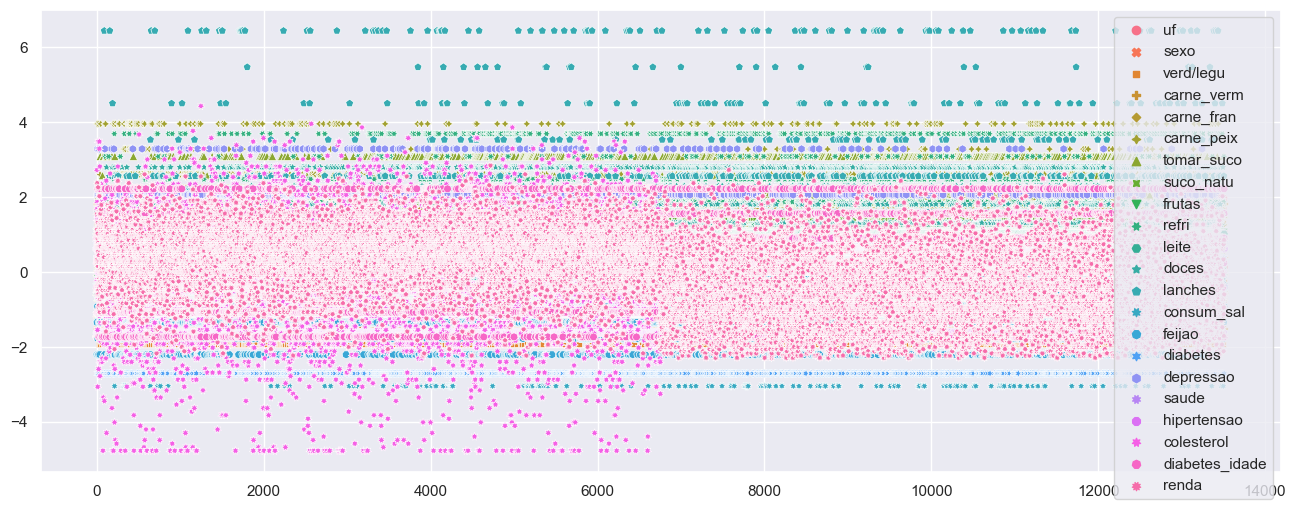

In [138]:
sns.scatterplot(data = df_feat)